In [1]:
# Loading packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

#

import math
import random
import os
import time

from numpy import interp

# Disabling warnings:

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_2020_cleaned_D2.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 4 numerical variables

The numerical variables are : ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


In [5]:
# view the numerical variables

df[numerical].head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [6]:
X = df.drop(['HeartDisease'], axis=1)

y = df['HeartDisease']

In [7]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((223856, 17), (95939, 17))

In [9]:
# check data types in X_train

X_train.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [10]:
# check missing values in X_train

X_train.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
# import category encoders

import category_encoders as ce

In [15]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [16]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [17]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [18]:
# check missing values in X_train

X_train.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [19]:
# check missing values in X_test

X_test.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [20]:
# print categorical variables

categorical

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [21]:
X_train[categorical].head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
163326,Yes,No,Yes,Yes,Female,75-79,White,No,No,Very good,No,No,No
163643,Yes,No,Yes,Yes,Female,70-74,White,No,No,Good,Yes,No,No
300121,No,No,No,No,Female,25-29,White,No,Yes,Very good,No,No,No
7994,No,No,No,No,Male,75-79,White,No,Yes,Excellent,No,No,No
147990,No,No,No,No,Male,80 or older,White,No,No,Excellent,No,No,Yes


In [22]:
# import category encoders

import category_encoders as ce

In [23]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [24]:
X_train.head()

,BMI,Smoking_1,Smoking_2,AlcoholDrinking_1,AlcoholDrinking_2,Stroke_1,Stroke_2,PhysicalHealth,MentalHealth,DiffWalking_1,...,GenHealth_3,GenHealth_4,GenHealth_5,SleepTime,Asthma_1,Asthma_2,KidneyDisease_1,KidneyDisease_2,SkinCancer_1,SkinCancer_2
163326,38.79,1,0,1,0,1,0,0.0,0.0,1,...,0,0,0,7.0,1,0,1,0,1,0
163643,37.79,1,0,1,0,1,0,5.0,4.0,1,...,0,0,0,8.0,0,1,1,0,1,0
300121,32.11,0,1,1,0,0,1,0.0,30.0,0,...,0,0,0,10.0,1,0,1,0,1,0
7994,29.12,0,1,1,0,0,1,0.0,0.0,0,...,1,0,0,8.0,1,0,1,0,1,0
147990,19.37,0,1,1,0,0,1,0.0,0.0,0,...,1,0,0,9.0,1,0,1,0,0,1


In [25]:
X_test.head()

,BMI,Smoking_1,Smoking_2,AlcoholDrinking_1,AlcoholDrinking_2,Stroke_1,Stroke_2,PhysicalHealth,MentalHealth,DiffWalking_1,...,GenHealth_3,GenHealth_4,GenHealth_5,SleepTime,Asthma_1,Asthma_2,KidneyDisease_1,KidneyDisease_2,SkinCancer_1,SkinCancer_2
126167,23.44,0,1,1,0,0,1,10.0,20.0,1,...,0,0,0,6.0,1,0,1,0,1,0
207506,32.49,0,1,1,0,0,1,0.0,4.0,0,...,1,0,0,8.0,1,0,1,0,1,0
274544,21.93,0,1,1,0,0,1,0.0,0.0,0,...,1,0,0,7.0,1,0,1,0,1,0
121049,26.58,0,1,1,0,0,1,0.0,2.0,0,...,0,0,0,7.0,1,0,1,0,1,0
260961,19.02,1,0,1,0,0,1,2.0,2.0,0,...,0,0,0,6.0,1,0,1,0,1,0


In [26]:
#Feature Scalling
cols = X_train.columns

In [27]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [29]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [30]:
X_train.head()

,BMI,Smoking_1,Smoking_2,AlcoholDrinking_1,AlcoholDrinking_2,Stroke_1,Stroke_2,PhysicalHealth,MentalHealth,DiffWalking_1,...,GenHealth_3,GenHealth_4,GenHealth_5,SleepTime,Asthma_1,Asthma_2,KidneyDisease_1,KidneyDisease_2,SkinCancer_1,SkinCancer_2
0,1.558424,1.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.422554,1.0,-1.0,0.0,0.0,1.0,-1.0,2.5,1.333333,1.0,...,0.0,0.0,0.0,0.5,-1.0,1.0,0.0,0.0,0.0,0.0
2,0.650815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,...,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0
3,0.244565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.080163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [31]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test)

y_pred

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype='<U3')

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7526


In [34]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype='<U3')

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.7536


In [36]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7536
Test set score: 0.7526


In [37]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[66265 21465]
 [ 2271  5938]]

True Positives(TP) =  66265

True Negatives(TN) =  5938

False Positives(FP) =  21465

False Negatives(FN) =  2271


<Axes: >

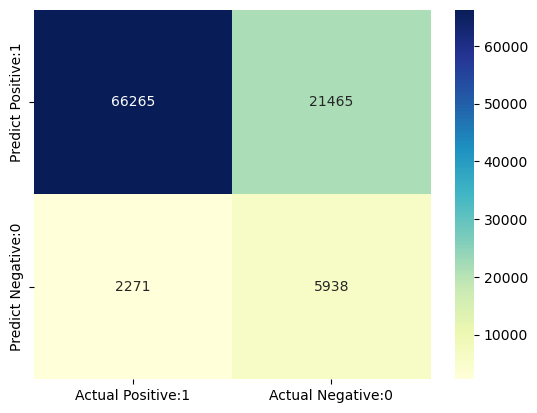

In [38]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.97      0.76      0.85     87730
         Yes       0.22      0.72      0.33      8209

    accuracy                           0.75     95939
   macro avg       0.59      0.74      0.59     95939
weighted avg       0.90      0.75      0.80     95939



In [40]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [41]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7526


In [42]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2474
